データのインポート

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='MS Gothic')

In [2]:
gdf=gpd.read_file('../data2020/A002005212020DDSWC12.zip')

メッシュ空間の作成

In [3]:
chibadata1= pd.read_csv('../data2020/tblT001104C12.zip', encoding='cp932')

1行目の削除

In [4]:
chibadata1 = chibadata1[1:]

＊をnanに置き換え

In [5]:
chibadata1 = chibadata1.replace('*',np.nan)



chiabadata１~８それぞれを結合

In [6]:
chibadata2020 = pd.concat([chibadata1])

In [7]:
columns=['HTKSYORI', 'HTKSAKI', 'GASSAN']
chibadata2020=chibadata2020.drop(columns=columns)




In [8]:
#chibadata = pd.merge(chibadata2020,on='KEY_CODE')
chibadata=chibadata2020

In [9]:
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 1 to 6767
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6767 non-null   float64
 1   HYOSYO      6767 non-null   float64
 2   CITYNAME    6767 non-null   object 
 3   NAME        6706 non-null   object 
 4   T001104001  6767 non-null   object 
 5   T001104002  6767 non-null   object 
 6   T001104003  6767 non-null   object 
 7   T001104004  6767 non-null   object 
 8   T001104005  6767 non-null   object 
 9   T001104006  6767 non-null   object 
 10  T001104007  6767 non-null   object 
 11  T001104008  6767 non-null   object 
 12  T001104009  6767 non-null   object 
 13  T001104010  6767 non-null   object 
 14  T001104011  6767 non-null   object 
 15  T001104012  6767 non-null   object 
 16  T001104013  6767 non-null   object 
dtypes: float64(2), object(15)
memory usage: 898.9+ KB


In [10]:
chibadata.columns

Index(['KEY_CODE', 'HYOSYO', 'CITYNAME', 'NAME', 'T001104001', 'T001104002',
       'T001104003', 'T001104004', 'T001104005', 'T001104006', 'T001104007',
       'T001104008', 'T001104009', 'T001104010', 'T001104011', 'T001104012',
       'T001104013'],
      dtype='object')

In [11]:
chibadata.columns[4:]

Index(['T001104001', 'T001104002', 'T001104003', 'T001104004', 'T001104005',
       'T001104006', 'T001104007', 'T001104008', 'T001104009', 'T001104010',
       'T001104011', 'T001104012', 'T001104013'],
      dtype='object')

In [12]:
chibadata=chibadata.replace('-',np.nan)

In [13]:
chibadata=chibadata.replace('X',np.nan)

In [14]:
chibadata[chibadata.columns[4:]]=chibadata[chibadata.columns[4:]].astype(float)

In [15]:
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 1 to 6767
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6767 non-null   float64
 1   HYOSYO      6767 non-null   float64
 2   CITYNAME    6767 non-null   object 
 3   NAME        6706 non-null   object 
 4   T001104001  6521 non-null   float64
 5   T001104002  5740 non-null   float64
 6   T001104003  6418 non-null   float64
 7   T001104004  6473 non-null   float64
 8   T001104005  6396 non-null   float64
 9   T001104006  6439 non-null   float64
 10  T001104007  5739 non-null   float64
 11  T001104008  5802 non-null   float64
 12  T001104009  6457 non-null   float64
 13  T001104010  6268 non-null   float64
 14  T001104011  6279 non-null   float64
 15  T001104012  6385 non-null   float64
 16  T001104013  5878 non-null   float64
dtypes: float64(15), object(2)
memory usage: 898.9+ KB


In [16]:
gdf['KEY_CODE']=gdf['KEY_CODE'].astype(float)

In [17]:
gdf =gdf.merge(chibadata, on='KEY_CODE')

In [18]:
gdf = gdf.to_crs(3857)

In [19]:
gdf

KEY_CODE PREF CITY  S_AREA PREF_NAME CITY_NAME  S_NAME KIGO_E   
0     1.210100e+08   12  101  001000       千葉県    千葉市中央区     青葉町    NaN  \
1     1.210100e+08   12  101  002000       千葉県    千葉市中央区     赤井町    NaN   
2     1.210100e+08   12  101  003000       千葉県    千葉市中央区      旭町    NaN   
3     1.210100e+08   12  101  004000       千葉県    千葉市中央区     市場町    NaN   
4     1.210101e+10   12  101  005001       千葉県    千葉市中央区  稲荷町一丁目    NaN   
...            ...  ...  ...     ...       ...       ...     ...    ...   
6673  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E1   
6674  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E2   
6675  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E3   
6676  1.246302e+08   12  463  017000       千葉県       鋸南町      奥山    NaN   
6677  1.246302e+08   12  463  018000       千葉県       鋸南町      大崩    NaN   

      HCODE         AREA  ...  T001104004  T001104005  T001104006 T001104007   
0      8101   842588.023  ...       359.0       148.0        96.0       18.0  \
1      8101  1376645.540  ...       147.0        84.0        75.0       20.0   
2      8101   102837.597  ...        94.0        57.0        47.0        8.0   
3      8101   124328.185  ...        38.0        32.0        23.0       11.0   
4      8101    71910.356  ...        73.0        53.0        48.0        7.0   
...     ...          ...  ...         ...         ...         ...        ...   
6673   8101  4108753.733  ...        15.0        14.0        19.0        2.0   
6674   8101   236169.523  ...        15.0        14.0        19.0        2.0   
6675   8101    12042.361  ...        15.0        14.0        19.0        2.0   
6676   8101  3045353.352  ...         3.0         NaN         4.0        NaN   
6677   8101  3607942.308  ...         4.0         2.0         7.0        NaN   

     T001104008 T001104009 T001104010 T001104011 T001104012 T001104013  
0           3.0       56.0       23.0       22.0       57.0       26.0  
1          15.0       68.0       37.0       38.0       43.0        9.0  
2           6.0       25.0       15.0        6.0       26.0       17.0  
3           NaN        9.0        1.0       11.0       12.0        4.0  
4           NaN       35.0       11.0       13.0       23.0        8.0  
...         ...        ...        ...        ...        ...        ...  
6673       45.0       13.0        5.0       11.0        9.0        1.0  
6674       45.0       13.0        5.0       11.0        9.0        1.0  
6675       45.0       13.0        5.0       11.0        9.0        1.0  
6676       10.0        3.0        3.0        1.0        3.0        NaN  
6677        8.0        3.0        3.0        4.0        3.0        NaN  

[6678 rows x 46 columns]

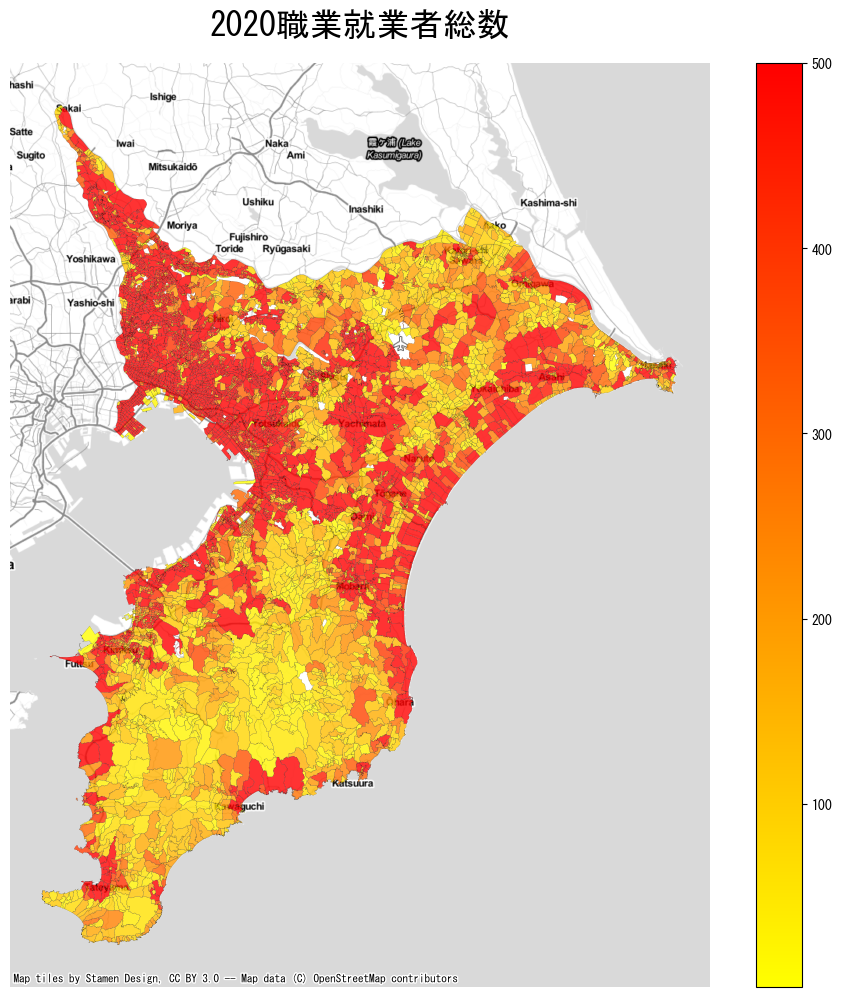

In [20]:
ax = gdf.plot(figsize=(12,12),
         column='T001104001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=500,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020職業就業者総数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

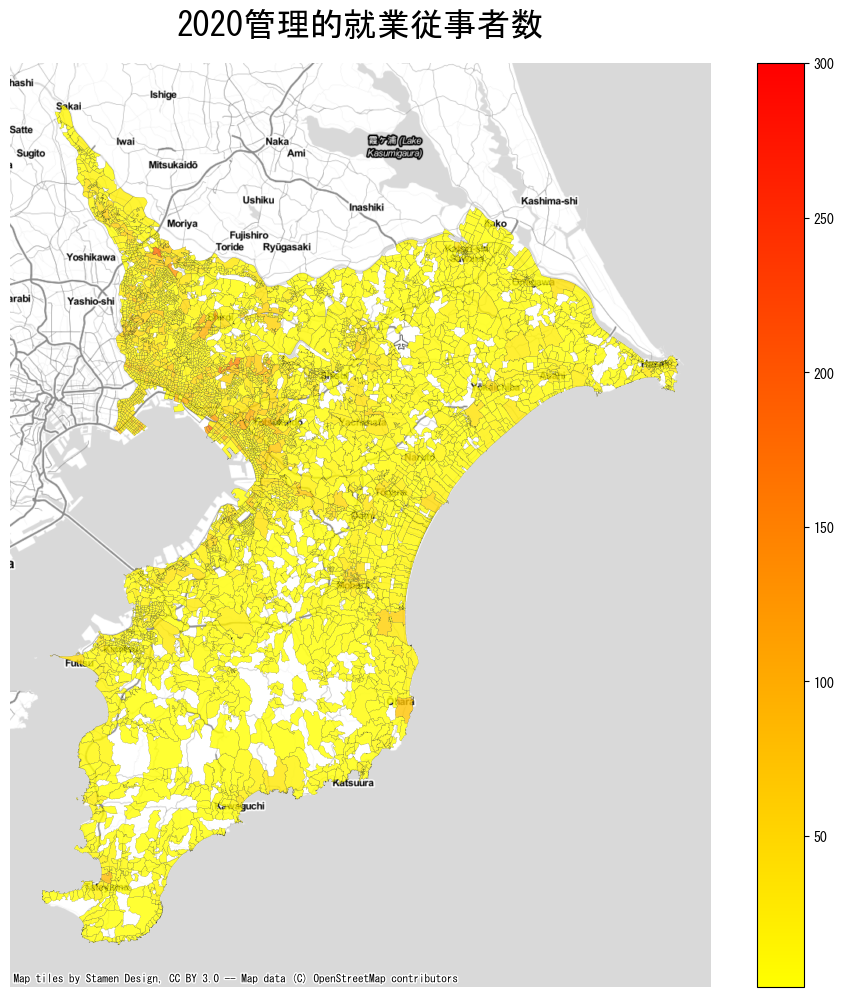

In [21]:
ax = gdf.plot(figsize=(12,12),
         column='T001104002',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=300,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020管理的就業従事者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

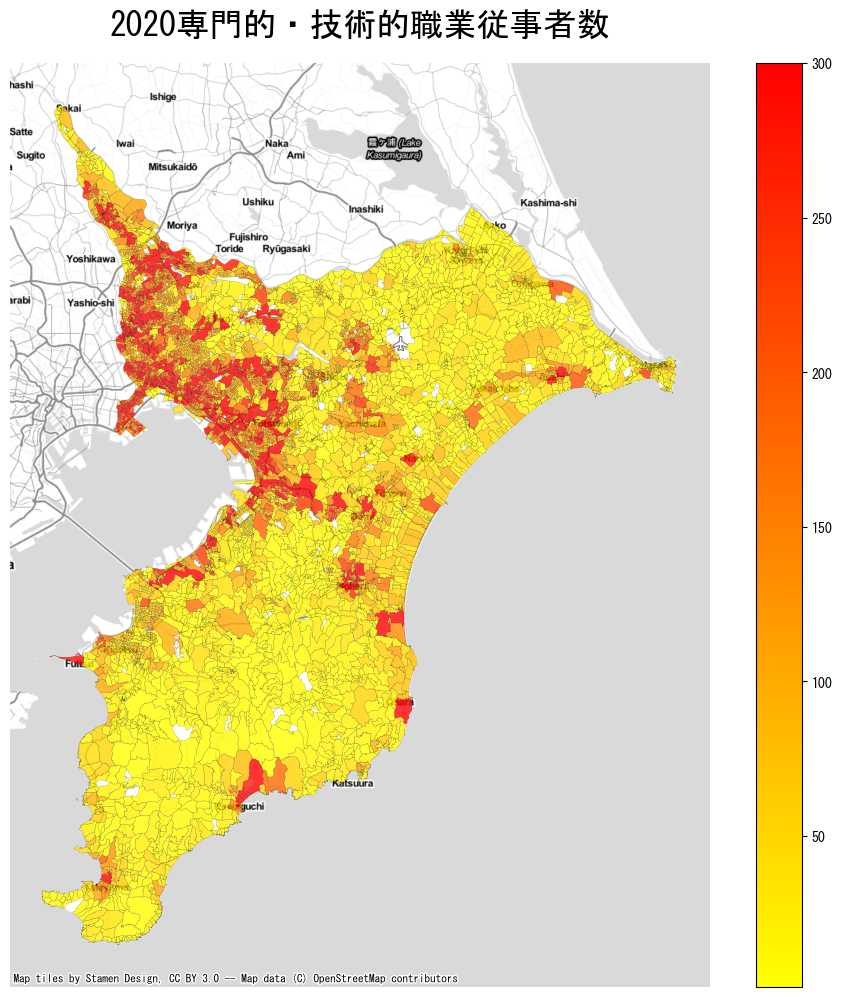

In [22]:
ax = gdf.plot(figsize=(12,12),
         column='T001104003',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=300,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020専門的・技術的職業従事者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

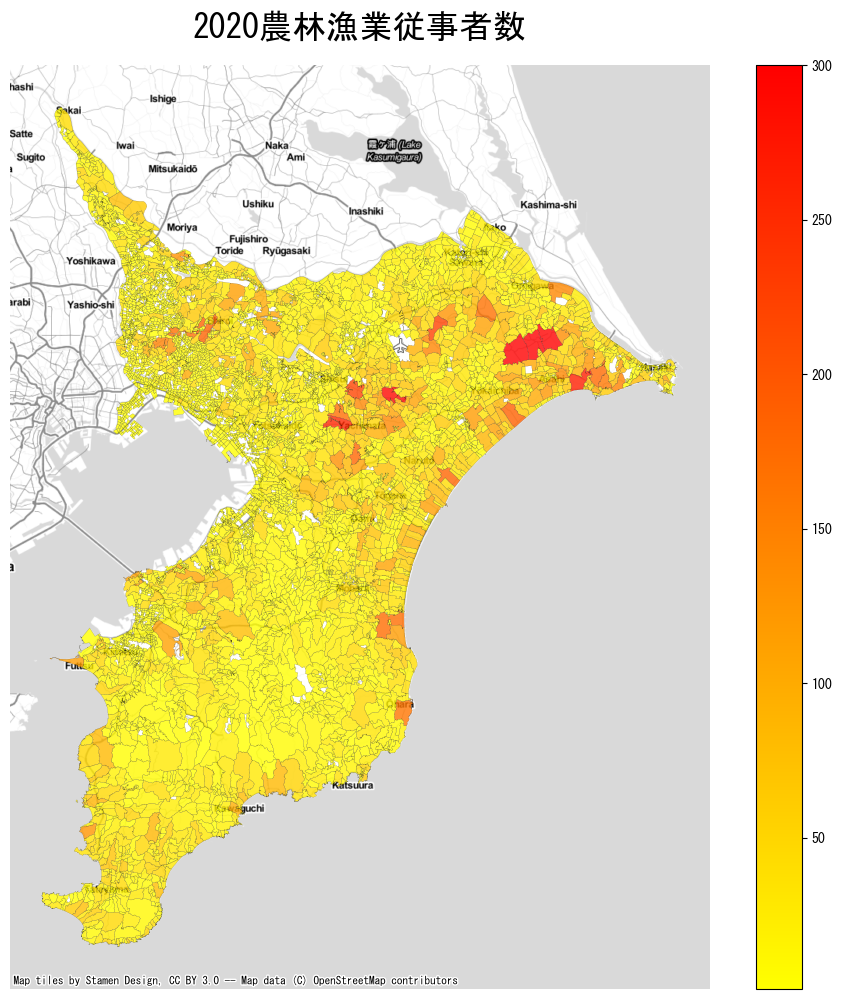

In [23]:
ax = gdf.plot(figsize=(12,12),
         column='T001104008',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=300,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020農林漁業従事者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

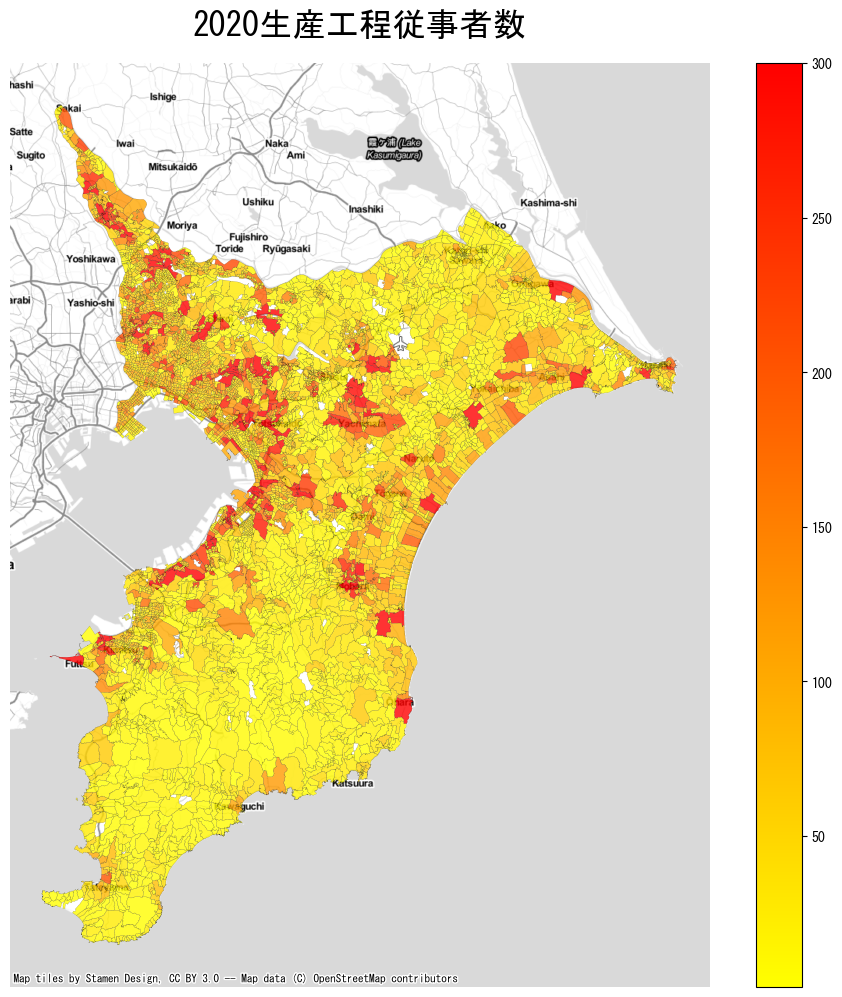

In [24]:
ax = gdf.plot(figsize=(12,12),
         column='T001104009',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=300,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020生産工程従事者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

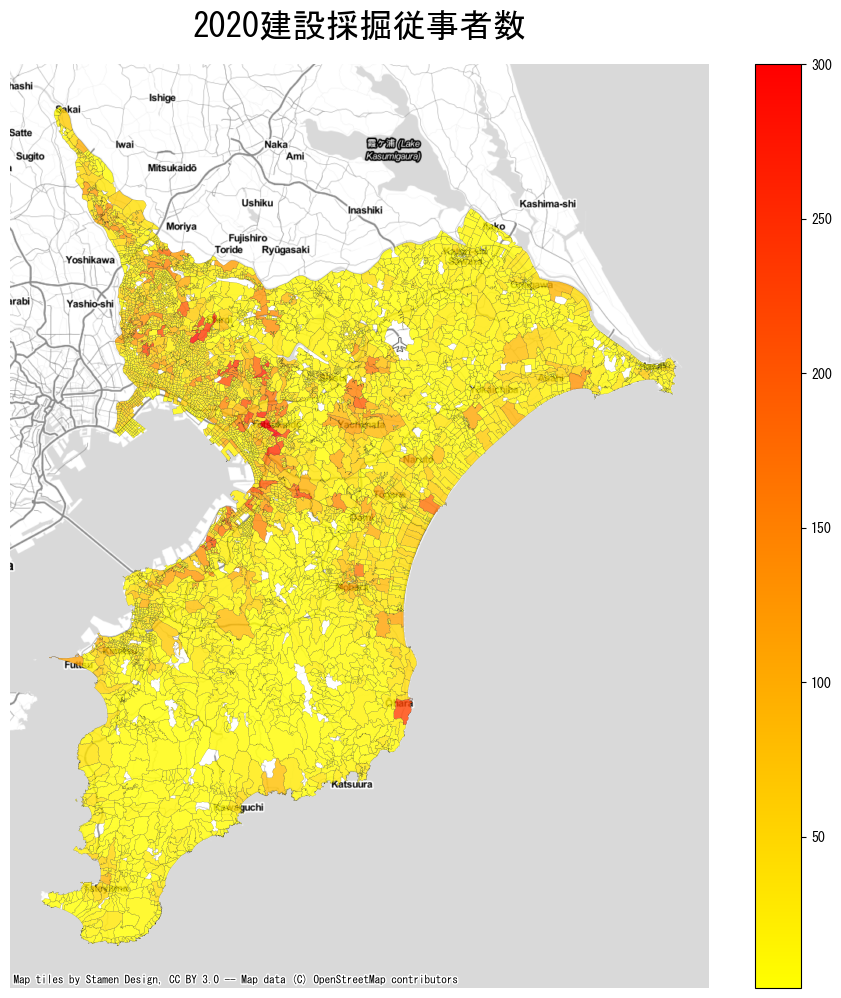

In [25]:
ax = gdf.plot(figsize=(12,12),
         column='T001104011',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=300,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020建設採掘従事者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [26]:
gdf

KEY_CODE PREF CITY  S_AREA PREF_NAME CITY_NAME  S_NAME KIGO_E   
0     1.210100e+08   12  101  001000       千葉県    千葉市中央区     青葉町    NaN  \
1     1.210100e+08   12  101  002000       千葉県    千葉市中央区     赤井町    NaN   
2     1.210100e+08   12  101  003000       千葉県    千葉市中央区      旭町    NaN   
3     1.210100e+08   12  101  004000       千葉県    千葉市中央区     市場町    NaN   
4     1.210101e+10   12  101  005001       千葉県    千葉市中央区  稲荷町一丁目    NaN   
...            ...  ...  ...     ...       ...       ...     ...    ...   
6673  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E1   
6674  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E2   
6675  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E3   
6676  1.246302e+08   12  463  017000       千葉県       鋸南町      奥山    NaN   
6677  1.246302e+08   12  463  018000       千葉県       鋸南町      大崩    NaN   

      HCODE         AREA  ...  T001104004  T001104005  T001104006 T001104007   
0      8101   842588.023  ...       359.0       148.0        96.0       18.0  \
1      8101  1376645.540  ...       147.0        84.0        75.0       20.0   
2      8101   102837.597  ...        94.0        57.0        47.0        8.0   
3      8101   124328.185  ...        38.0        32.0        23.0       11.0   
4      8101    71910.356  ...        73.0        53.0        48.0        7.0   
...     ...          ...  ...         ...         ...         ...        ...   
6673   8101  4108753.733  ...        15.0        14.0        19.0        2.0   
6674   8101   236169.523  ...        15.0        14.0        19.0        2.0   
6675   8101    12042.361  ...        15.0        14.0        19.0        2.0   
6676   8101  3045353.352  ...         3.0         NaN         4.0        NaN   
6677   8101  3607942.308  ...         4.0         2.0         7.0        NaN   

     T001104008 T001104009 T001104010 T001104011 T001104012 T001104013  
0           3.0       56.0       23.0       22.0       57.0       26.0  
1          15.0       68.0       37.0       38.0       43.0        9.0  
2           6.0       25.0       15.0        6.0       26.0       17.0  
3           NaN        9.0        1.0       11.0       12.0        4.0  
4           NaN       35.0       11.0       13.0       23.0        8.0  
...         ...        ...        ...        ...        ...        ...  
6673       45.0       13.0        5.0       11.0        9.0        1.0  
6674       45.0       13.0        5.0       11.0        9.0        1.0  
6675       45.0       13.0        5.0       11.0        9.0        1.0  
6676       10.0        3.0        3.0        1.0        3.0        NaN  
6677        8.0        3.0        3.0        4.0        3.0        NaN  

[6678 rows x 46 columns]

In [27]:
gdf['CITY_NAME'].value_counts().reset_index()

CITY_NAME  count
0        市原市    475
1         柏市    352
2        船橋市    340
3        松戸市    339
4       木更津市    264
5        佐倉市    258
6        香取市    245
7        市川市    238
8        君津市    223
9        成田市    213
10       野田市    204
11       銚子市    171
12       印西市    162
13      我孫子市    148
14       流山市    148
15    千葉市中央区    139
16      八千代市    138
17    千葉市若葉区    124
18       茂原市    123
19      南房総市    123
20      横芝光町    104
21      習志野市     96
22       東金市     96
23       山武市     95
24   千葉市花見川区     94
25      鎌ケ谷市     92
26       富津市     89
27        旭市     85
28       浦安市     83
29      四街道市     82
30      袖ケ浦市     80
31     千葉市緑区     77
32       館山市     76
33    千葉市稲毛区     70
34       鴨川市     69
35       匝瑳市     67
36      大多喜町     67
37      いすみ市     62
38       白井市     60
39       八街市     60
40     大網白里市     59
41        栄町     58
42       勝浦市     55
43    千葉市美浜区     52
44       長柄町     50
45       多古町     49
46       富里市     48
47      酒々井町     34
48       長南町     33
49       東庄町     29
50       芝山町     25
51       鋸南町     24
52       一宮町     23
53     九十九里町     21
54       長生村     20
55       神崎町     18
56       白子町     17
57       睦沢町     16
58       御宿町     16

In [28]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6678 entries, 0 to 6677
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6678 non-null   float64 
 1   PREF        6678 non-null   object  
 2   CITY        6678 non-null   object  
 3   S_AREA      6678 non-null   object  
 4   PREF_NAME   6678 non-null   object  
 5   CITY_NAME   6678 non-null   object  
 6   S_NAME      6676 non-null   object  
 7   KIGO_E      1090 non-null   object  
 8   HCODE       6678 non-null   int64   
 9   AREA        6678 non-null   float64 
 10  PERIMETER   6678 non-null   float64 
 11  R2KAxx      6678 non-null   int64   
 12  R2KAxx_ID   6678 non-null   int64   
 13  KIHON1      6678 non-null   object  
 14  DUMMY1      6678 non-null   object  
 15  KIHON2      6678 non-null   object  
 16  KEYCODE1    6678 non-null   object  
 17  KEYCODE2    6678 non-null   object  
 18  AREA_MAX_F  5961 non-null   object  
 19

In [41]:
citysum=gdf.groupby('CITY_NAME')['T001104001'].sum().reset_index()
citysum=citysum.sort_values('T001104001',ascending=False)
px.bar(citysum.head(10),x='CITY_NAME',y='T001104001')

In [52]:
def rank(job,title):
    citysum=gdf.groupby('CITY_NAME')[job].sum().reset_index()
    citysum=citysum.sort_values(job,ascending=False)
    fig=px.bar(citysum.head(10),x='CITY_NAME',y=job,template='seaborn',title=title)
    fig.show()

In [54]:
rank(job='T001104001',title='2020職業就業者総数')
#総数

In [56]:
rank(job='T001104002',title='2020管理的就業従事者数')

In [57]:
rank(job='T001104003',title='2020専門的・技術的職業従事者数')

In [58]:
rank(job='T001104008',title='2020農林漁業従事者数')

In [60]:
rank(job='T001104009',title='2020生産工程従事者数')

In [61]:
rank(job='T001104011',title='2020建設採掘従事者数')